In [1]:
# Main imports
import numpy as np
import pandas as pd

# Import matplotlib and such
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.ion()

from helper_functions import \
    thermodynamic_model, \
    plot_manifold_model, \
    plot_manifold_measurements, \
    get_measurement_subset_df
    

In [2]:
# Set global styles
textwidth=5.5
halfcolwidth=3
fontsize=8
titlesize=10
panel_label_size=12
legend_fontsize=7
markersize=5
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

# Get default colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Used to create color gradient across data points of different P values
color_strong = np.array([.11, .69, .93])
color_weak = np.array([1.00, .94, .21])

# Conversion parameter
kbt_to_kcal = 1/1.62

# From previous analysis
F_50 = 23.89230  # FINAL 18.11.08
t_sat_fixed = np.exp(2.722414412) # FINAL 18.11.08
alphap_c61 = np.exp(6.60105807)  # FINAL 18.11.08
t_bg_c61 = np.exp(-5.531544058)# FINAL 18.11.08

# Compute this
alpha_c61 = alphap_c61*(1 + 1/F_50)-1/F_50

In [3]:
# Load clonal measurements 
data_df = pd.read_excel('../data/results.xlsx', sheet_name='measurements_summary').set_index('name')
data_df.head()

,location,log_t+,dlog_t+,log_t-,dlog_t-,num_t+,num_t-,outlier,spacing,sequence
name,,,,,,,,,,
61c-oc0,b5E4,-1.691993,0.146085,1.357366,0.088154,6,6,0.0,0.5,CGCAATGAATCACTCCATTGAGTGTTTTGAGGGTCCCCAGGCTTTA...
61c-ocl,b5A8,-4.955585,0.477209,-2.652523,0.185727,12,6,0.0,4.5,CGCAATGAATCACTCCATTGAGTGTTTTGAGGGTCCCCAGGCTTTA...
61c-ocl.35L01,b5B2,-5.426847,1.395136,-3.139291,0.053276,15,9,0.0,4.5,CGCAATGAATCACTCCATTGAGTGTTTTGAGGGTCCCCAGGGTTTA...
61c-ocl.35L02,b5B3,-5.057494,1.232833,-2.840256,0.373761,15,9,0.0,4.5,CGCAATGAATCACTCCATTGAGTGTTTTGAGGGTCCCCAGGCTTTA...
61c-ocl.35L04,b5B5,-4.600446,0.550925,-4.516905,0.056885,14,6,0.0,4.5,CGCAATGAATCACTCCATTGAGTGTTTTGAGGGTCCCCACCCTTAA...


In [4]:
# Create table of beta values and their uncertainties
beta_df = pd.DataFrame(columns=['spacing','sheet','log_betap_50','log_betap_16','log_betap_84'])
sheets = [
    'c60_beta_resamp',
    'c61_beta_resamp',
    'c62_beta_resamp',
    'c63_beta_resamp',
    'c64_beta_resamp',
    'c65_beta_resamp',
    'c71_beta_resamp',
    'c72_beta_resamp',
    'c81_beta_resamp',
    'c82_beta_resamp'
    ]
beta_df['sheet'] = sheets
spacings = [-float(sheet[1:3])-.5 for sheet in sheets]
beta_df['spacing'] = spacings

for i, sheet in enumerate(sheets):
    print('Processing sheet %s...'%sheet)
    df = pd.read_excel('../data/results.xlsx', sheet_name=sheet)
    log_betaps = df['log_betap'].values[1:]
    beta_df.loc[i,'log_betap_50'] = np.percentile(log_betaps,50)
    beta_df.loc[i,'log_betap_16'] = np.percentile(log_betaps,16)
    beta_df.loc[i,'log_betap_84'] = np.percentile(log_betaps,84)

#beta_df.dropna(inplace=True)
beta_df

Processing sheet c60_beta_resamp...
Processing sheet c61_beta_resamp...
Processing sheet c62_beta_resamp...
Processing sheet c63_beta_resamp...
Processing sheet c64_beta_resamp...
Processing sheet c65_beta_resamp...
Processing sheet c71_beta_resamp...
Processing sheet c72_beta_resamp...
Processing sheet c81_beta_resamp...
Processing sheet c82_beta_resamp...


,spacing,sheet,log_betap_50,log_betap_16,log_betap_84
0,-60.5,c60_beta_resamp,0.181498,0.0274405,0.702431
1,-61.5,c61_beta_resamp,-0.0447166,-0.0693276,-0.0153614
2,-62.5,c62_beta_resamp,0.0333394,-0.0661741,0.203811
3,-63.5,c63_beta_resamp,-0.179554,-1.23092,0.16778
4,-64.5,c64_beta_resamp,0.015325,-0.160785,0.295203
5,-65.5,c65_beta_resamp,0.310637,-0.183969,0.635177
6,-71.5,c71_beta_resamp,-0.0612695,-0.149688,0.0430993
7,-72.5,c72_beta_resamp,-0.0832424,-0.173175,0.0262054
8,-81.5,c81_beta_resamp,-0.157498,-0.291567,-0.0128596
9,-82.5,c82_beta_resamp,-0.190007,-0.437449,-0.092602


c61r18: 47 points
r17.10con35L: 9 points
r17.35con10L: 9 points
n = 65-3 points plotted for  c61r18 + r17.10con35L + r17.35con10L
Number of spacings for which beta is plotted: 10


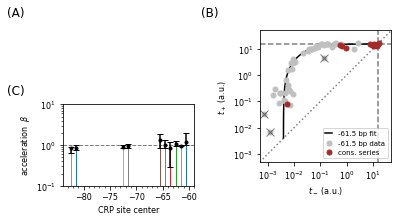

In [5]:
# Create figure and axes
fig, _ = plt.subplots(figsize=[textwidth,3])
color='black'

gs = gridspec.GridSpec(2, 2, top=.98, bottom=.15, left=.15, right=.98, wspace=.5)

### Panel B
markersize=5
ax = plt.subplot(gs[:,1])

# Plot measurements
ax.axhline(t_sat_fixed,linestyle='--',color='gray')
ax.axvline(t_sat_fixed,linestyle='--',color='gray')

# Specify which data points to plot in which colors
samples_labels_colors = [
    ('c61r18', '-61.5 bp data', 'silver'),
    ('r17.10con35L','cons. series','brown'),
    ('r17.35con10L',None,'brown')
]

# Plot best fit model
plot_manifold_model(ax=ax, 
                    t_sat=t_sat_fixed,
                    t_bg=t_bg_c61,
                    alpha=alpha_c61,
                    F = F_50,
                    color='black',
                    label='-61.5 bp fit',
                    )

# Plot measurements
lim = [5E-4,5E1]
num_points, num_outliers = plot_manifold_measurements(ax=ax, 
                               df=data_df, 
                               samples_labels_colors=samples_labels_colors, 
                               markersize=markersize, 
                               fontsize=fontsize,
                               lim=lim,
                               ticks=[1E-3,1E-2,1E-1,1E0,1E1])

ax.set_aspect('equal')
ax.legend(handlelength=1,fontsize=7)

### Panel C
ax = plt.subplot(gs[1,0])

ax.axhline(1, linestyle='--', color='gray', linewidth=1, zorder=-10)

spacings = beta_df['spacing'].values
betas_50 = np.exp(beta_df['log_betap_50'].astype('float32'))
betas_16 = np.exp(beta_df['log_betap_16'].astype('float32'))
betas_84 = np.exp(beta_df['log_betap_84'].astype('float32'))
dbetas_plus = betas_84-betas_50
dbetas_minus = betas_50 - betas_16

markersize=3
ax.errorbar(spacings, betas_50, yerr=[dbetas_minus, dbetas_plus], 
            linestyle='none', marker='o', markersize=markersize, capsize=markersize, color='k')

xlim = np.array([-84,-59])
ax.set_yscale("log", nonposy='clip')
ax.set_ylim([.1,10])
ax.set_xlim(xlim)
ax.set_ylabel('acceleration  $\\beta$')
ax.set_xlabel('CRP site center')

# Show minor tick marks on x
from matplotlib.ticker import AutoMinorLocator
minorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(minorLocator)

# Draw stems
colors_dict = {
    -60.5:colors[0],
    -61.5:colors[1],
    -62.5:colors[2],
    -63.5:colors[3],
    -64.5:colors[4],
    -65.5:colors[5],
    -66.5:colors[6],
    -71.5:colors[7],
    -72.5:colors[8],
    -76.5:colors[9],
    -81.5:colors[0],
    -82.5:colors[1]
}

for n, s in enumerate(spacings):
    beta = betas_50[n]
    color = colors_dict[s]
    ax.plot([s,s], [.01,beta], '-', linewidth=1, zorder=-100, color=color)
print('Number of spacings for which beta is plotted: %d'%len(spacings))
        
        
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.50,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
plt.figtext(.01,.62,'(C)', fontsize=panel_label_size, horizontalalignment='left', verticalalignment='top')
        
fig.savefig('../figures/plt_acceleration_results.pdf', transparent=True)

In [6]:
np.exp(beta_df['log_betap_50'].values.astype('float32'))

array([1.1990124 , 0.9562685 , 1.0339013 , 0.8356425 , 1.0154431 ,
       1.3642945 , 0.94056976, 0.9201281 , 0.85427874, 0.82695323],
      dtype=float32)